In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from intrinsic.pipeline import load_models, run_pipeline
from chrislib.data_util import load_image
import cv2
# Imports
import fnmatch
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.utils.data
from PIL import Image

import numpy as np
import torchvision
import torchvision.transforms.functional as Tf
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
import random

import matplotlib.patches as patches




In [ ]:
# Clone the repository
!git clone https://github.com/compphoto/Intrinsic.git

# Navigate to the repository
%cd Intrinsic

# Install the repository as a package
!pip install .

Cloning into 'Intrinsic'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 203 (delta 53), reused 24 (delta 13), pack-reused 113 (from 1)
Receiving objects: 100% (203/203), 37.41 MiB | 12.78 MiB/s, done.
Resolving deltas: 100% (92/92), done.
/content/Intrinsic
Processing /content/Intrinsic
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CCareaga/MiDaS (to revision master) to /tmp/pip-install-mj5era8a/altered-midas_100f60259dba425d9d6b343367ad0d2d
  Running command git clone --filter=blob:none --quiet https://github.com/CCareaga/MiDaS /tmp/pip-install-mj5era8a/altered-midas_100f60259dba425d9d6b343367ad0d2d
  Resolved https://github.com/CCareaga/MiDaS to commit 59d696a98796adddff37f6322c34586bf25b6674
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CCareaga/chrislib (to revision main) to /tmp/pip-install-mj5era8a/chrislib_6c5ab89938c44a19934e1b

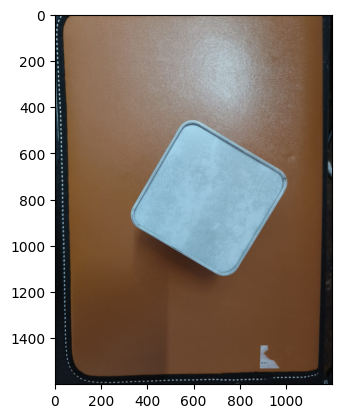

In [ ]:
img = Image.open('/content/box-or.jpeg')
plt.imshow(img)

In [ ]:
models = load_models('v2')

# Set the image path directly
input_image_path = '/content/box-or.jpeg'  # Your image path
image = load_image(input_image_path)

# Run the pipeline
results = run_pipeline(models, image)

# Access results
albedo = results['hr_alb']
shading = results['dif_shd']
residual = results['residual']

# Save or display the results
cv2.imwrite('/content/albedo.png', (albedo * 255).astype('uint8'))
cv2.imwrite('/content/shading.png', (shading * 255).astype('uint8'))
cv2.imwrite('/content/residual.png', (residual * 255).astype('uint8'))

print("Processing complete. Albedo, Shading, and Residual images saved!")

Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_0.pt" to /root/.cache/torch/hub/checkpoints/stage_0.pt
100%|██████████| 403M/403M [00:10<00:00, 40.3MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_1.pt" to /root/.cache/torch/hub/checkpoints/stage_1.pt
100%|██████████| 81.8M/81.8M [00:02<00:00, 31.8MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_2.pt" to /root/.cache/torch/hub/checkpoints/stage_2.pt
100%|██████████| 403M/403M [00:10<00:00, 38.8MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_3.pt" to /root/.cache/torch/hub/checkpoints/stage_3.pt
100%|██████████| 403M/403M [00:09<00:00, 44.9MB/s]
Downloading: "https://github.com/compphoto/Intrinsic/releases/download/v2.0/stage_4.pt" to /root/.cache/torch/hub/checkpoints/stage_4.pt
100%|██████████| 403M/403M [00:10<00:00, 41.6MB/s]
Downloading: "https://github.com/facebookresearch/WSL-Imag

Processing complete. Albedo, Shading, and Residual images saved!


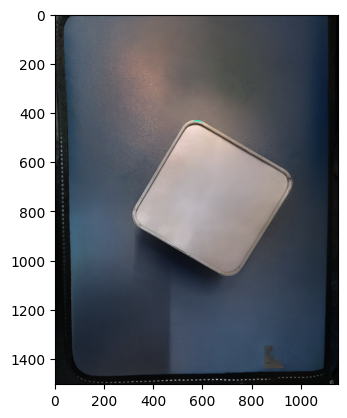

In [ ]:
img = Image.open('/content/shading.png')
plt.imshow(img)

In [ ]:

# def edge_detection(image_path, low_threshold=50, high_threshold=150, blur_kernel_size=(5, 5)):
#     """
#     Edge detection using the Canny Edge Detector.

#     Parameters:
#         image_path (str): Path to the input image.
#         low_threshold (int): Lower threshold for hysteresis procedure in Canny.
#         high_threshold (int): Upper threshold for hysteresis procedure in Canny.
#         blur_kernel_size (tuple): Kernel size for Gaussian blur.

#     Returns:
#         edges (numpy.ndarray): Binary image with detected edges.
#     """
#     # Read the input image
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     if image is None:
#         raise FileNotFoundError(f"The file {image_path} was not found.")

#     # Apply Gaussian Blur to reduce noise
#     blurred = cv2.GaussianBlur(image, blur_kernel_size, 0)

#     # Apply Canny Edge Detection
#     edges = cv2.Canny(blurred, low_threshold, high_threshold)

#     return edges

# # Example usage
# if __name__ == "__main__":
#     image_path = 'fromtop.57.54.jpeg'  # Replace with your image file path

#     # Parameters for edge detection
#     low_threshold = 50
#     high_threshold = 150
#     blur_kernel_size = (5, 5)

#     # Detect edges
#     try:
#         edges = edge_detection(image_path, low_threshold, high_threshold, blur_kernel_size)

#         # Display the original image and the edges
#         original_image = cv2.imread(image_path)
#         plt.figure(figsize=(10, 5))
#         plt.subplot(1, 2, 1)
#         plt.title("Original Image")
#         plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
#         plt.axis("off")

#         plt.subplot(1, 2, 2)
#         plt.title("Edges")
#         plt.imshow(edges, cmap="gray")
#         plt.axis("off")

#         plt.tight_layout()
#         plt.show()
#     except FileNotFoundError as e:
#         print(e)

# Mask R-CNN for Bin Picking

This notebook is adopted from the [TorchVision 0.3 Object Detection finetuning tutorial](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html).  We will be finetuning a pre-trained [Mask R-CNN](https://arxiv.org/abs/1703.06870) model on a dataset generated from our "clutter generator" script.


https://manipulation.csail.mit.edu/segmentation.html

In [ ]:
ycb = [
    "003_cracker_box.sdf",
    "004_sugar_box.sdf",
    "005_tomato_soup_can.sdf",
    "006_mustard_bottle.sdf",
    "009_gelatin_box.sdf",
    "010_potted_meat_can.sdf",
]

# Download our bin-picking model

And a small set of images for testing.

In [ ]:
dataset_path = "clutter_maskrcnn_data"
if not os.path.exists(dataset_path):
    !wget https://groups.csail.mit.edu/locomotion/clutter_maskrcnn_test.zip .
    !unzip -q clutter_maskrcnn_test.zip

num_images = len(fnmatch.filter(os.listdir(dataset_path), "*.png"))


def open_image(idx):
    filename = os.path.join(dataset_path, f"{idx:05d}.png")
    return Image.open(filename).convert("RGB")


model_file = "clutter_maskrcnn_model.pt"
if not os.path.exists(model_file):
    !wget https://groups.csail.mit.edu/locomotion/clutter_maskrcnn_model.pt .

--2025-01-05 10:48:29--  https://groups.csail.mit.edu/locomotion/clutter_maskrcnn_test.zip
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.52.131.233
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://locomotion.csail.mit.edu/clutter_maskrcnn_test.zip [following]
--2025-01-05 10:48:29--  https://locomotion.csail.mit.edu/clutter_maskrcnn_test.zip
Resolving locomotion.csail.mit.edu (locomotion.csail.mit.edu)... 128.52.131.233
Connecting to locomotion.csail.mit.edu (locomotion.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5280952 (5.0M) [application/zip]
Saving to: ‘clutter_maskrcnn_test.zip’

clutter_maskrcnn_te 100%[===================>]   5.04M  8.62MB/s    in 0.6s    

2025-01-05 10:48:30 (8.62 MB/s) - ‘clutter_maskrcnn_test.zip’ saved [5280952/5280952]

--2025-01-05 10:48:30--  http://./
Resolvi

# Load the model

In [ ]:

def get_instance_segmentation_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(
        weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT
    )

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask, hidden_layer, num_classes
    )

    return model


num_classes = len(ycb) + 1
model = get_instance_segmentation_model(num_classes)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.load_state_dict(torch.load("clutter_maskrcnn_model.pt", map_location=device))
model.eval()

model.to(device)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:03<00:00, 54.0MB/s]
<ipython-input-8-6561fe79d563>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you do

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

# Plot the object detections

In [ ]:

def plot_prediction():
    img_np = np.array(img)
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(img_np)

    cmap = plt.get_cmap("tab20b")
    colors = [cmap(i) for i in np.linspace(0, 1, 20)]

    num_instances = prediction[0]["boxes"].shape[0]
    bbox_colors = random.sample(colors, num_instances)
    boxes = prediction[0]["boxes"].cpu().numpy()
    labels = prediction[0]["labels"].cpu().numpy()

    for i in range(num_instances):
        color = bbox_colors[i]
        bb = boxes[i, :]
        bbox = patches.Rectangle(
            (bb[0], bb[1]),
            bb[2] - bb[0],
            bb[3] - bb[1],
            linewidth=2,
            edgecolor=color,
            facecolor="none",
        )
        ax.add_patch(bbox)
        plt.text(
            bb[0],
            bb[0],
            s=ycb[labels[i]],
            color="white",
            verticalalignment="top",
            bbox={"color": color, "pad": 0},
        )
    plt.axis("off")


# plot_prediction()

# Visualize the region proposals

Let's visualize some of the intermediate results of the networks.

TODO: would be very cool to put a slider on this so that we could slide through ALL of the boxes.  But my matplotlib non-interactive backend makes it too tricky!

In [ ]:
# class Inspector:
#     """A helper class from Kuni to be used for torch.nn.Module.register_forward_hook."""

#     def __init__(self):
#         self.x = None

#     def hook(self, module, input, output):
#         self.x = output


# inspector = Inspector()
# model.rpn.register_forward_hook(inspector.hook)

# with torch.no_grad():
#     prediction = model([Tf.to_tensor(img).to(device)])

# rpn_values = inspector.x


# img_np = np.array(img)
# plt.figure()
# fig, ax = plt.subplots(1, figsize=(12, 9))
# ax.imshow(img_np)

# cmap = plt.get_cmap("tab20b")
# colors = [cmap(i) for i in np.linspace(0, 1, 20)]

# num_to_draw = 20
# bbox_colors = random.sample(colors, num_to_draw)
# boxes = rpn_values[0][0].cpu().numpy()
# print(f"Region proposals (drawing first {num_to_draw} out of {boxes.shape[0]})")

# for i in range(num_to_draw):
#     color = bbox_colors[i]
#     bb = boxes[i, :]
#     bbox = patches.Rectangle(
#         (bb[0], bb[1]),
#         bb[2] - bb[0],
#         bb[3] - bb[1],
#         linewidth=2,
#         edgecolor=color,
#         facecolor="none",
#     )
#     ax.add_patch(bbox)
# plt.axis("off");

# Try a few more images

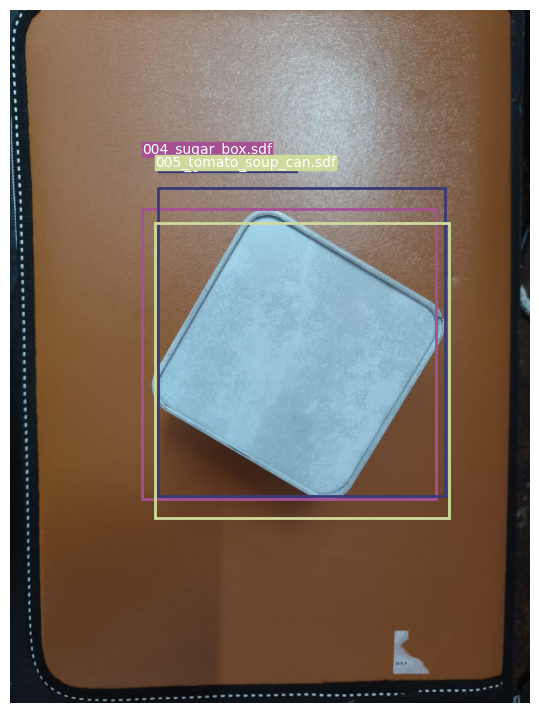

In [ ]:
# pick one image from the test set (choose between 9950 and 9999)
# img = open_image(9985)

img = Image.open('/content/box-or.jpeg').convert("RGB")
with torch.no_grad():
    prediction = model([Tf.to_tensor(img).to(device)])

plot_prediction()

In [ ]:
print(prediction[0]['boxes'])

tensor([[ 877.3805, 1497.1553, 1109.8708, 1596.2836],
        [ 322.9525,  507.7430,  902.0615, 1112.5104]], device='cuda:0')


In [ ]:
# # print(prediction[0].keys())
# # print(prediction[0]['labels'])
# target_label = "004_sugar_box.sdf"

# target_index = -1
# # Get the corresponding index of the target label (if available)
# for idx, label in enumerate(prediction[0]["labels"]):
#     if label == target_label:  # Modify this check based on your label representation
#         target_index = idx
#         break
# print(target_index)

0


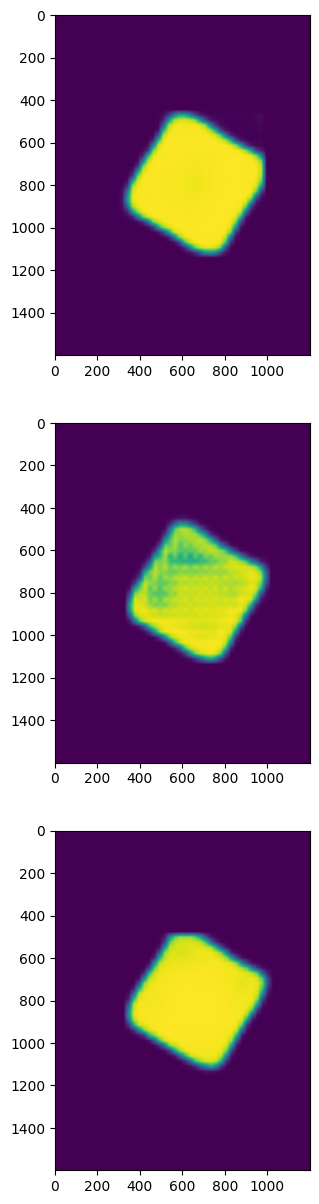

In [ ]:
N = prediction[0]["masks"].shape[0]
fig, ax = plt.subplots(N, 1, figsize=(15, 15))
for n in range(prediction[0]["masks"].shape[0]):
    ax[n].imshow(
        np.asarray(
            Image.fromarray(prediction[0]["masks"][n, 0].mul(255).byte().cpu().numpy())
        )
    )

True

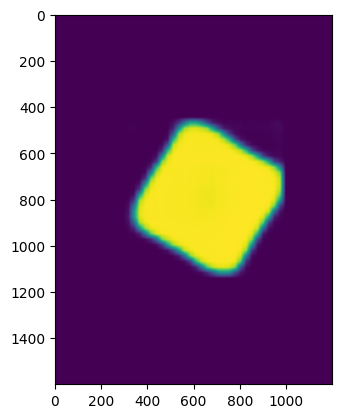

In [ ]:
target_index = 0
plt.imshow(prediction[0]["masks"][target_index, 0].mul(255).byte().cpu().numpy())
cv2.imwrite("/content/box-mask.png", prediction[0]["masks"][target_index, 0].mul(255).byte().cpu().numpy())

Pose visualisation with ellipse


In [ ]:

# def get_pose_from_mask(mask):
#     """
#     Extract the centroid and orientation (angle) of the object from the segmentation mask.

#     Args:
#         mask (numpy.ndarray): Binary segmentation mask (255 for object, 0 for background).

#     Returns:
#         centroid (tuple): (x, y) coordinates of the object's centroid.
#         orientation (float): Orientation angle of the object in degrees.
#         major_axis (tuple): Start and end points of the major axis line for visualization.
#     """
#     # Find contours in the mask
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     if len(contours) == 0:
#         return None, None, None  # No object detected in the mask

#     # Get the largest contour (assuming the object of interest is the largest)
#     largest_contour = max(contours, key=cv2.contourArea)

#     # Calculate the centroid of the largest contour
#     moments = cv2.moments(largest_contour)
#     if moments["m00"] == 0:
#         return None, None, None  # Avoid division by zero
#     cx = int(moments["m10"] / moments["m00"])
#     cy = int(moments["m01"] / moments["m00"])
#     centroid = (cx, cy)

#     # Fit an ellipse to the contour to estimate orientation
#     if len(largest_contour) >= 5:  # Ellipse fitting requires at least 5 points
#         ellipse = cv2.fitEllipse(largest_contour)
#         orientation = ellipse[2]  # Angle of the ellipse in degrees

#         # Compute the major axis of the ellipse
#         (center, axes, angle) = ellipse
#         major_axis_length = axes[1] / 2  # Half-length of the major axis
#         angle_rad = np.deg2rad(orientation)

#         # Calculate the major axis line endpoints
#         x1 = int(center[0] + major_axis_length * np.cos(angle_rad))
#         y1 = int(center[1] - major_axis_length * np.sin(angle_rad))
#         x2 = int(center[0] - major_axis_length * np.cos(angle_rad))
#         y2 = int(center[1] + major_axis_length * np.sin(angle_rad))
#         major_axis = ((x1, y1), (x2, y2))
#     else:
#         orientation = None
#         major_axis = None

#     return centroid, orientation, major_axis

# # Example usage
# if __name__ == "__main__":
#     # Load the segmentation mask (binary image: 255 for object, 0 for background)
#     mask = cv2.imread("segmentation_mask-o.png", cv2.IMREAD_GRAYSCALE)

#     # Ensure the mask is binary
#     _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

#     # Get pose information
#     centroid, orientation, major_axis = get_pose_from_mask(mask)

#     if centroid and orientation is not None and major_axis is not None:
#         print(f"Centroid: {centroid}")
#         print(f"Orientation: {orientation:.2f} degrees")

#         # Visualize results
#         output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

#         # Draw the centroid
#         cv2.circle(output_image, centroid, 5, (0, 0, 255), -1)  # Red dot for centroid

#         # Draw the orientation line (major axis)
#         cv2.line(output_image, major_axis[0], major_axis[1], (255, 0, 0), 2)  # Blue line

#         # Annotate the orientation angle
#         cv2.putText(output_image, f"{orientation:.2f} degrees",
#                     (centroid[0] + 20, centroid[1]), cv2.FONT_HERSHEY_SIMPLEX,
#                     0.5, (0, 255, 0), 2)

#         # Save and display results
#         cv2.imwrite("pose_visualization_with_angle-0.png", output_image)
#     else:
#         print("No object detected in the segmentation mask.")


Centroid: (612, 828)
Orientation: 85.90 degrees


Pose visualisation with bounding box


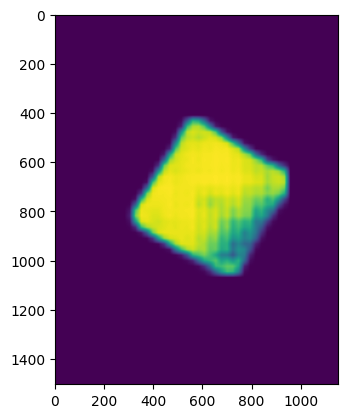

In [ ]:
img = Image.open('/content/box-mask.png')
plt.imshow(img)

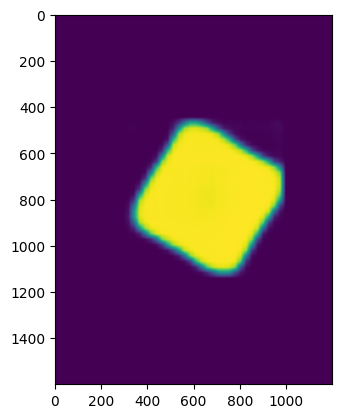

In [ ]:
img = Image.open('/content/box-mask.png')
numpy_array = np.array(img)

plt.imshow(numpy_array)

In [ ]:

def get_pose_from_mask(mask):
    """
    Extract the centroid and orientation (angle) of the object from the segmentation mask using a rotated bounding box.

    Args:
        mask (numpy.ndarray): Binary segmentation mask (255 for object, 0 for background).

    Returns:
        centroid (tuple): (x, y) coordinates of the object's centroid.
        orientation (float): Orientation angle of the object in degrees.
        bounding_box (numpy.ndarray): Coordinates of the rotated bounding box.
    """
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No object detected in the mask.099E")
        return None, None, None  # No object detected in the mask

    # Get the largest contour (assuming the object of interest is the largest)
    largest_contour = max(contours, key=cv2.contourArea)

    # Calculate the centroid of the largest contour
    moments = cv2.moments(largest_contour)
    if moments["m00"] == 0:
        return None, None, None  # Avoid division by zero
    cx = int(moments["m10"] / moments["m00"])
    cy = int(moments["m01"] / moments["m00"])
    centroid = (cx, cy)

    # Compute the rotated bounding box
    rect = cv2.minAreaRect(largest_contour)
    box = cv2.boxPoints(rect)  # Get the four corners of the rotated bounding box
    box = np.int0(box)  # Convert to integer
    orientation = rect[2]  # Orientation angle of the bounding box in degrees

    return centroid, orientation, box

# Example usage
if __name__ == "__main__":
    # Load the segmentation mask (binary image: 255 for object, 0 for background)
    mask = cv2.imread("/content/processed_image.png'", cv2.IMREAD_GRAYSCALE)

    # Ensure the mask is binary
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Get pose information
    centroid, orientation, bounding_box = get_pose_from_mask(mask)

    if centroid and orientation is not None:
        print(f"Centroid: {centroid}")
        print(f"Orientation: {orientation:.2f} degrees")

        # Visualize results
        output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        cv2.circle(output_image, centroid, 5, (0, 0, 255), -1)  # Draw centroid
        cv2.putText(output_image, f"{orientation:.2f} degrees",
                    (centroid[0] + 20, centroid[1]), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), 2)

        # Draw the rotated bounding box
        cv2.drawContours(output_image, [bounding_box], -1, (255, 0, 0), 2)

        # Save the visualization
        cv2.imwrite("pose_visualization_bounding_box-o.png", output_image)
    else:
        print("No object detected in the segmentation mask.")


No object detected in the mask.099E
No object detected in the segmentation mask.


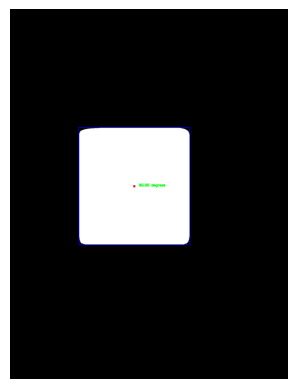

In [ ]:

# Load the image
img = Image.open('pose_visualization_bounding_box-o.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Hide axes for a cleaner view
plt.show()


# SIFT DESCRIPTOR

In [ ]:
def region_proposals(input_path):
  print('Generating region proposals...')
  img = Image.open(input_path).convert("RGB")
  with torch.no_grad():
      prediction = model([Tf.to_tensor(img).to(device)])

  plot_prediction()

def create_binary_mask(input_path):
  print('Creating binary mask...')
  plt.imshow(prediction[0]["masks"][target_index, 0].mul(255).byte().cpu().numpy())
  cv2.imwrite("box-mask.png", prediction[0]["masks"][target_index, 0].mul(255).byte().cpu().numpy())

In [ ]:
#this function returns the centriod, orientation, bbox-image
def pose_estim_bb(mask_path):
    print('Estimating pose...')
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        return None, None, None  # No object detected in the mask

    # Get the largest contour (assuming the object of interest is the largest)
    largest_contour = max(contours, key=cv2.contourArea)

    # Calculate the centroid of the largest contour
    moments = cv2.moments(largest_contour)
    if moments["m00"] == 0:
        return None, None, None  # Avoid division by zero
    cx = int(moments["m10"] / moments["m00"])
    cy = int(moments["m01"] / moments["m00"])
    centroid = (cx, cy)

    # Compute the rotated bounding box
    rect = cv2.minAreaRect(largest_contour)
    box = cv2.boxPoints(rect)  # Get the four corners of the rotated bounding box
    box = np.int0(box)  # Convert to integer
    orientation = rect[2]  # Orientation angle of the bounding box in degrees

    return centroid, orientation, box

def visualiser(img, title):
  plt.imshow(img)
  plt.title(title)
  plt.show()

Processed image saved to /content/processed_image.png


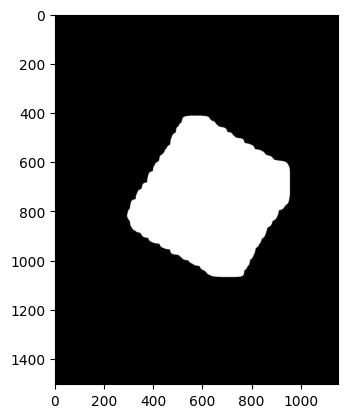

In [ ]:
def process_image_to_white(input_path, output_path = ''):
    # Open the image
    image = Image.open(input_path).convert("RGB")

    # Convert the image to a NumPy array
    img_array = np.array(image)

    # Define the threshold for "black" pixels
    # A pixel is considered black if its RGB values are all below this threshold
    black_threshold = 10

    # Create a mask for non-black pixels
    non_black_mask = np.any(img_array > black_threshold, axis=-1)

    # Set all non-black pixels to white (255, 255, 255)
    img_array[non_black_mask] = [255, 255, 255]

    # Convert the array back to an image
    processed_image = Image.fromarray(img_array)


    output_path = "/content/processed_image.png"
    # Save the processed image
    processed_image.save(output_path)
    print(f"Processed image saved to {output_path}")
process_image_to_white('/content/box-mask.png')
img_ = Image.open('/content/processed_image.png')
plt.imshow(img_)

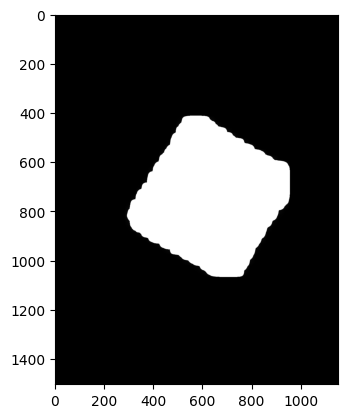

In [ ]:
img_ = Image.open('/content/processed_image.png')
plt.imshow(img_)

SIFT descriptors..


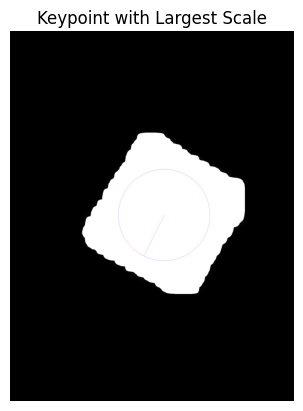

SIFT descriptors..


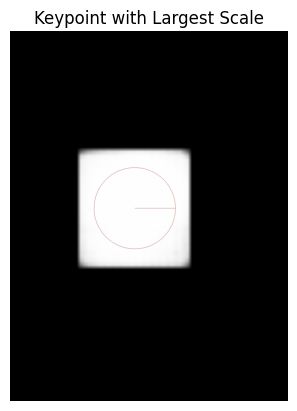

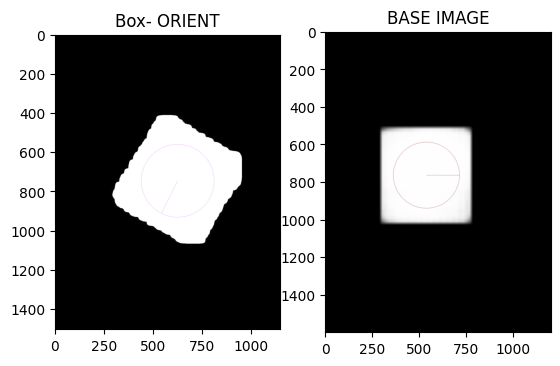

Shape of descriptor for box:  (128,) for circle:  (128,)


In [ ]:
#this function returns the image with keypoints, len(keypoints) and descriptors
import cv2
import matplotlib.pyplot as plt

def sift(input_path):
    print('SIFT descriptors..')

    # Load the image in grayscale
    image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Image not found at the specified path.")

    # Create a SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)

    if not keypoints:
        print("No keypoints detected!")
        return None, 0, None

    # Find the keypoint with the largest scale (size)
    largest_keypoint = max(keypoints, key=lambda kp: kp.size)
    largest_descriptor = descriptors[keypoints.index(largest_keypoint)]

    # Draw the keypoint with the largest scale
    image_with_largest_keypoint = cv2.drawKeypoints(
        image,
        [largest_keypoint],  # Wrap in a list
        None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Display the result
    plt.imshow(image_with_largest_keypoint, cmap='gray')
    plt.title('Keypoint with Largest Scale')
    plt.axis('off')
    plt.show()

    # Return the image, the largest keypoint, and its descriptor
    return image_with_largest_keypoint, largest_keypoint, largest_descriptor

img_box, len_kb, des_box = sift('/content/processed_image.png')
img_circle, len_kc, des_circle = sift('/content/box-mask-real.png')
plt.subplot(1, 2, 1)
plt.imshow(img_box)
plt.title('Box- ORIENT')
plt.subplot(1, 2, 2)
plt.imshow(img_circle)
plt.title('BASE IMAGE')
plt.show()

print('Shape of descriptor for box: ', des_box.shape, 'for circle: ', des_circle.shape)

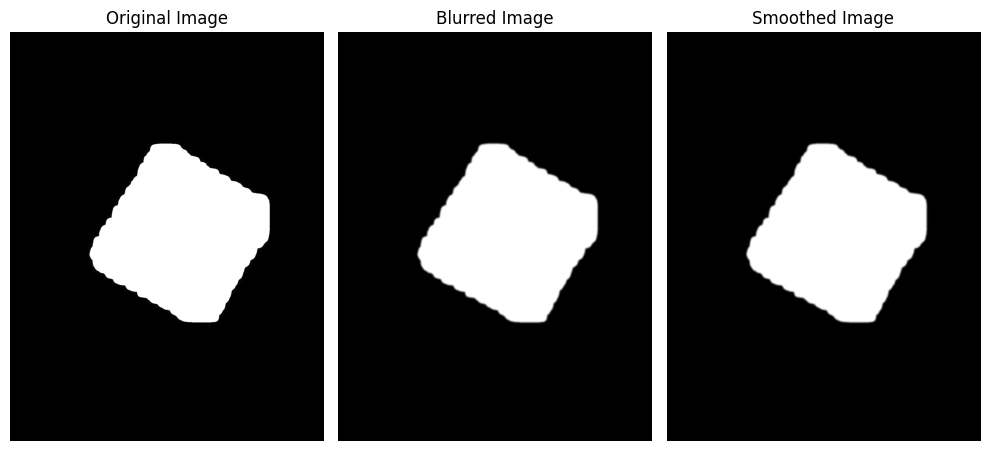

In [ ]:

# Load the image
image_path = '/content/processed_image.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, binary = cv2.threshold(image, 10, 255, cv2.THRESH_BINARY)

# Apply Gaussian Blur to smooth edges
blurred = cv2.GaussianBlur(binary, (15, 15), 0)

# Perform morphological operations (optional)
kernel = np.ones((5, 5), np.uint8)
smoothed = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Blurred Image")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Smoothed Image")
plt.imshow(smoothed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

def calculate_similarity(des_box, des_circle):
    """
    Compare two sets of SIFT descriptors and return a similarity score.

    Parameters:
    - des_box: Descriptors of the first image (e.g., box).
    - des_circle: Descriptors of the second image (e.g., circle).

    Returns:
    - similarity: A float value representing the similarity score (0 to 1).
    """
    # Check if descriptors are valid
    if des_box is None or des_circle is None:
        raise ValueError("Descriptors cannot be None.")

    if len(des_box) == 0 or len(des_circle) == 0:
        raise ValueError("One of the descriptor sets is empty.")

    # Use BFMatcher with default L2 norm for SIFT descriptors
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

    # Find matches using k-nearest neighbors (k=2 for Lowe's ratio test)
    matches = bf.knnMatch(des_box, des_circle, k=2)

    # Apply Lowe's Ratio Test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:  # Threshold of 0.75
            good_matches.append(m)

    # Calculate similarity score
    # Normalize the score by the average of the total descriptors in both sets
    total_descriptors = (len(des_box) + len(des_circle)) / 2
    similarity = len(good_matches) / total_descriptors

    return similarity

# Example Usage:
# des_box and des_circle should be numpy arrays of shape (N, 128) where N is the number of descriptors
similarity = calculate_similarity(des_box, des_circle)
print(f"Similarity Score: {similarity:.2f}")


Similarity Score: 0.06


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def similarity(des_box, des_cirlce): #hardcode this inthe function for best descriptors, and take only 1 parameter as input
  ##the code should be changed to return the class with minum errors
  similarities = []
  for i in range(des_box.shape[0]):
      similarity = cosine_similarity(des_box[i].reshape(1, -1), des_circle[i].reshape(1, -1))
      similarities.append(similarity[0][0])  # Extract the similarity value

  # Compute the average similarity
  average_similarity = np.mean(similarities)

  print(f"Similarity values for each descriptor pair: {similarities}")
  print(f"Average Similarity: {average_similarity:.2f}")